# TEDS SGM to RemoTAP input for TANGO-Carbon

#### This notebook shows how to construct RemoTAP forward simulation inputs from scratch using the TANGO-Carbon GM and SGM, and how to run a forward simulation on them. It is based on the full-chain example, exp1_full_chain.

Dependencies for this notebook:

* All dependencies of `exp1_full_chain`
* [GitPython](https://github.com/gitpython-developers/GitPython)
* [h5netcdf](https://h5netcdf.org/)
* cmake, make
* Fortran compiler, gfortran or ifort
* BLAS/LAPACK libraries
* NetCDF and HDF5 libraries for Fortran
* RemoTAP LUT data

## 1. Reference
+ ATBD
+ User manual <a href="https://teds.rtfd.io/"> online document</a>

## 2. Initialization

#### 2.1 Setup the working environment

In [1]:
import sys
import os
import yaml
import subprocess
import platform
import shutil
import git
import h5netcdf
from matplotlib import pyplot as plt

# define  path to search for module
sys.path.append("/Users/petersk/teds/")
os.chdir("/Users/petersk/teds/examples/exp10_remotap_link/")

#### 2.2 import TEDS modules

In [2]:
from teds.gm import geometry_module
from teds.sgm import geoscene_generation
from teds.sgm.sgm_geoscene_to_remotap import convert_geoscene_to_remotap, fill_ini_template

#### 2.3 Select the target scene named after the targeted power plant 
Currently, four reference scenes can be used: (1) Matimba, (2) Jenschwalde, (3) Belchatow, (4) Lipetsk.


In [3]:
#station_name = 'Matimba'
station_name = 'Jaenschwalde'
#station_name = 'Belchatow'
#station_name = 'Lipetsk'

### 2.4 Configure specific run
All module interfaces are file-based. So, if input files exist, they cn be called as 'stand-alone'. Note that you might to run low level modules to generate the input. PM modules can be also used as 'stand-alone' for data analysis.

This notebook can run a forward simulation for example purposes, but only operates on a trimmed-down version of the full granule, containing only the first line. If you wish to perform a forward simulation on the entire granule, please do so manually from a terminal. In this case, do be aware that a RemoTAP forward simulation of a full 135000-pixel granule can take well over a day to compute.

In [4]:
proc_gm          = True; pam_gm     = False
proc_sgmgeo      = True; pam_sgmgeo = False
proc_sgm2remotap = True
clone_remotap = True; build_remotap = True
proc_forward = True; show_spectrum = True

## 3. Geometry Model

#### 3.1 Run the GM module

In [5]:
if(proc_gm):
    #configureation file
    gm_config= yaml.safe_load(open('./settings/gm_config_stations.yaml'))
    #select the list for the selected target
    gm_config['orbit'] = gm_config[station_name]['orbit']
    gm_config['sensors'] = gm_config[station_name]['sensors']
    geometry_module(gm_config)

2024-12-13 15:26:29,224 : teds.lib.lib_utils : gm : 334 : INFO : propagate orbit...


[15:26:29] propagate orbit...


2024-12-13 15:26:31,767 : teds.lib.lib_utils : gm : 355 : INFO : defining sensor sensor_00__00


[15:26:31] defining sensor sensor_00__00


2024-12-13 15:26:31,800 : teds.lib.lib_utils : gm : 380 : INFO : compute the ground pixels (gpx)


[15:26:31] compute the ground pixels (gpx)


2024-12-13 15:26:31,802 : teds.lib.lib_utils : libOrbSim : 276 : INFO :     satellite position


[15:26:31]     satellite position


2024-12-13 15:26:31,803 : teds.lib.lib_utils : libOrbSim : 288 : INFO :     satellite ground points


[15:26:31]     satellite ground points


2024-12-13 15:26:31,806 : teds.lib.lib_utils : libOrbSim : 302 : INFO :     viewing angles


[15:26:31]     viewing angles


2024-12-13 15:26:31,808 : teds.lib.lib_utils : libOrbSim : 311 : INFO :     solar angles


[15:26:31]     solar angles


/Users/petersk/Tango_E2ES/data/interface_data2/gm/Tango_Carbon_gm_exp10.nc
2024-12-13 15:26:31,832 : teds.lib.lib_utils : gm : 464 : INFO : =>gm calculation finished successfully. 


[15:26:31] =>gm calculation finished successfully. 


#### 3.2 Visualization of the GM output

For plt_options use 'geoloc' to show the geolocation of the pixel center points, and 'geometry' to show solar zenith angle, viewing zenith angle, solar azimuth angle, and viewing azimuth angle.

In [6]:
if(pam_gm):
    gm_config= yaml.safe_load(open('./settings/gm_config_stations.yaml'))
    filen = gm_config['io_files']['output_gm']
    plt_option = 'geoloc'
    pam_co2.pam_gm_Tango_Carbon(filen, station_name, plt_option)

## 4. Scene Generatior Module (SGM): Geo-Physical Scene

### 4.1 Run the SGM-GEO module

In [7]:
if(proc_sgmgeo):
    sgmgeo_config= yaml.safe_load(open('./settings/geosgm_config_stations.yaml'))
    #adjust target specific configs
    sgmgeo_config['io_files']['input_s2'] = sgmgeo_config[station_name]['input_s2']
    sgmgeo_config['io_files']['meteo'] = sgmgeo_config[station_name]['meteo']

    geoscene_generation(sgmgeo_config)

Getting meteo data ...
                     ...done
Combining microHH and AFGL model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 370/370 [00:01<00:00, 207.92it/s]
[15:26:54] Reading refractive index tables.
INFO:teds.lib.remotap_preproc.refractive_index:Reading refractive index tables.
[15:26:54] Collocation of aerosol_echam file started.
INFO:teds.lib.remotap_preproc.aerosol_echam:Collocation of aerosol_echam file started.
[15:26:54] Reading echam file /Volumes/hammerspace/DATA_CLEAN/ORBIT_SOURCE_DATA/ECHAM/ECHAM_aerosol_new_scaled_DEMheight.nc
INFO:teds.lib.remotap_preproc.aerosol_echam:Reading echam file /Volumes/hammerspace/DATA_CLEAN/ORBIT_SOURCE_DATA/ECHAM/ECHAM_aerosol_new_scaled_DEMheight.nc
[15:26:54] [WARNING] Newer ECHAM file /Volumes/hammerspace/DATA_CLEAN/ORBIT_SOURCE_DATA/ECHAM/ECHAM_aerosol_new_scaled_DEMheight.nc does not exist. Defaulting to /Volumes/hammerspace/DATA_CLEAN/ORBIT_SOURCE_DATA/ECHAM/ECHAM_aerosol_new_scaled.nc
[15:26:54]

=>sgm geoscene calculation finished successfully


### 4.2 Vizualization of SGM-GPS output

plt_options is used to configure the output. 
* The input 'albedo Bxx' specifies the spectral band to be plotted. Here, xx is the band specification. Only bands can be plotted that are given in the input data (e.g. B08 is not available but the more norrow band B08A can be plotted). 
* The input 'Xxx' specifies the trace gas. Here, xx can be CO2, NO, NO2, CH4, or H2O

In [8]:
if(pam_sgmgeo):
    sgmgeo_config= yaml.safe_load(open('./settings/geosgm_config_stations.yaml'))
    filen = sgmgeo_config['io_files']['output_geo']
    plt_option = 'XCO2'
    #plt_option = 'albedo B11'
    pam_co2.pam_sgm_gps(filen, station_name, plt_option)

## 5. RemoTAP

Load configuration.

In [9]:
sgm2remotap_config = yaml.safe_load(open('./settings/sgm2remotap_config.yaml'))

### 5.1. Convert files to RemoTAP inputs

In [10]:
if proc_sgm2remotap:
    convert_geoscene_to_remotap(sgm2remotap_config)

Generating RemoTAP geometry... done.
Generating RemoTAP input... done.
Generating RemoTAP aux... done.
Generating RemoTAP ini... done.


### 5.2 Clone RemoTAP

This step requires access to SRON Gitlab. If you wish to clone from a different server, set the URI in `remotap_repo_uri` below. If you have acquired RemoTAP from another source, place the root directory at the path given by `srcdir_remotap` in the config file `./settings/sgm2remotap_config.yaml` and skip the clone step.

In [11]:
remotap_repo_uri = 'git@gitlab.sron.nl:esg/remotap.git'

remotap_srcdir = sgm2remotap_config['io_files']['srcdir_remotap']

repo = None
if clone_remotap:
    try:
        repo = git.Repo.clone_from(remotap_repo_uri, remotap_srcdir)
    except Exception as e:
        print(e)
        print("Clone failed. Perhaps you require a password.")
        print("Please execute the following command from the terminal:")
        print(f"git clone '{remotap_repo_uri}' '{remotap_srcdir}'")
        repo = None
    


Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v -- git@gitlab.sron.nl:esg/remotap.git /Users/petersk/remotap-tango/
  stderr: 'Cloning into '/Users/petersk/remotap-tango'...
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
git@gitlab.sron.nl: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
'
Clone failed. Perhaps you require a password.
Please execute the following command from the terminal:
git clone 'git@gitlab.sron.nl:esg/remotap.git' '/Users/petersk/remotap-tango/'


#### Switch to `layers_from_aux` branch

In [12]:
if clone_remotap:
    try:
        repo
    except:
        repo = None
        
    if repo is None:
        repo = git.Repo(remotap_srcdir)
    repo.git.checkout('origin/layers_from_aux')

### 5.3. Compile RemoTAP

The following will attempt to compile the RemoTAP forward simulator using CMake.

In [13]:
remotap_srcdir = sgm2remotap_config['io_files']['srcdir_remotap']
remotap_builddir = os.path.join(remotap_srcdir, "RemoTAP", "build_fwd")

if os.path.isdir(remotap_builddir):
    print("Build directory exists; scrapping it!")
    shutil.rmtree(remotap_builddir)
    
os.makedirs(remotap_builddir, exist_ok=True)
os.chdir(remotap_builddir)

cmake_cmd = ['cmake', '-D', 'option_use_fwd=ON']
if platform.system() == 'Darwin':
    cmake_cmd += ['-D', 'compile_suit=Homebrew-GCC']
cmake_cmd.append('..')
status = subprocess.run(cmake_cmd, capture_output=True)
print(status.stdout.decode())
print(status.stderr.decode())

# Repeat to set variables correctly
status = subprocess.run(cmake_cmd, capture_output=True)
print(status.stdout.decode())
print(status.stderr.decode())

# Build it!
if status.returncode == 0:
    print("Compiling RemoTAP. This will take a while!")
    status = subprocess.run(['make'], capture_output=True)
    print(status.stdout.decode())
    print(status.stderr.decode())

-- The Fortran compiler identification is GNU 14.2.0
-- Checking whether Fortran compiler has -isysroot
-- Checking whether Fortran compiler has -isysroot - yes
-- Checking whether Fortran compiler supports OSX deployment target flag
-- Checking whether Fortran compiler supports OSX deployment target flag - yes
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /opt/homebrew/bin/gfortran - skipped
-- Configuring done (2.4s)
-- Generating done (0.3s)
-- Build files have been written to: /Users/petersk/remotap-tango/RemoTAP/build_fwd

CMake Warning (dev) at CMakeLists.txt:2 (enable_language):
  project() should be called prior to this enable_language() call.
This warning is for project developers.  Use -Wno-dev to suppress it.


-- Configuring done (0.1s)
-- Generating done (0.8s)
-- Build files have been written to: /Users/petersk/remotap-tango/RemoTAP/build_fwd

CMake Warning (dev) at CMakeLists.txt:2 (enable_lang

### 5.4 Trim down granule for example forward simulation

In [14]:
geom = sgm2remotap_config['io_files']['output_geometry']
inp = sgm2remotap_config['io_files']['output_input']
aux = sgm2remotap_config['io_files']['output_aux']
ini = sgm2remotap_config['io_files']['output_ini']

geom_reduced = "{}_reduced{}".format(*os.path.splitext(geom))
inp_reduced = "{}_reduced{}".format(*os.path.splitext(inp))
aux_reduced = "{}_reduced{}".format(*os.path.splitext(aux))
ini_reduced = "{}_reduced{}".format(*os.path.splitext(ini))

In [15]:
if proc_forward:
    Nalt = 1
    Nact = -1
    Npix = -1

    with h5netcdf.File(geom) as nc:
        Nact = nc.dimensions["Nacross_track"].size
        Npix = Nalt*Nact

        with h5netcdf.File(geom_reduced, "w") as nc_out:
            out_dims = {}
            for d in nc.dimensions.keys():
                sz = nc.dimensions[d].size
                if d == "Npix":
                    sz = Npix
                elif d == "Nalong_track":
                    sz = Nalt
                out_dims[d] = sz
            nc_out.dimensions.update(out_dims)

            for v in nc.variables.keys():
                data = nc.variables[v][:]
                data = data[:Npix]
                outvar = nc_out.create_variable(
                    v,
                    dimensions=nc.variables[v].dimensions,
                    dtype=nc.variables[v].dtype,
                    data=data
                )

    with h5netcdf.File(inp) as nc:
        with h5netcdf.File(inp_reduced, "w") as nc_out:
            nc_out.dimensions = {"Npix": Npix}
            for g in nc.groups.keys():
                grp = nc.groups[g]
                ogrp = nc_out.create_group(g)
                out_dims = {}
                for d in grp.dimensions.keys():
                    out_dims[d] = grp.dimensions[d].size
                ogrp.dimensions = out_dims

                for v in grp.variables.keys():
                    dims = grp.variables[v].dimensions
                    data = grp.variables[v][:]
                    if dims[0] == "Npix":
                        data = data[:Npix]
                    elif len(dims) >= 2 and dims[1] == "Npix":
                        data = data[:,:Npix]
                    elif len(dims) >= 3 and dims[2] == "Npix":
                        data = data[:,:,:Npix]

                    ogrp.create_variable(
                        v,
                        dimensions=dims,
                        dtype=grp.variables[v].dtype,
                        data=data
                    )

    with h5netcdf.File(aux) as nc:
        with h5netcdf.File(aux_reduced, "w") as nc_out:
            out_dims = {}
            for d in nc.dimensions.keys():
                out_dims[d] = nc.dimensions[d].size if d != "Npix" else Npix
            nc_out.dimensions.update(out_dims)
            for v in nc.variables.keys():
                dims = nc.variables[v].dimensions
                data = nc.variables[v][:]
                if dims[0] == "Npix":
                    data = data[:Npix]
                elif len(dims) >= 2 and dims[1] == "Npix":
                    data = data[:,:Npix]
                elif len(dims) >= 3 and dims[2] == "Npix":
                    data = data[:,:,:Npix]

                nc_out.create_variable(
                    v,
                    dimensions=dims,
                    dtype=nc.variables[v].dtype,
                    data=data
                )

    with open(ini_reduced, "w") as ini_out:
        if not sgm2remotap_config['io_files']['dir_remotap_data'].endswith('/'):
            sgm2remotap_config['io_files']['dir_remotap_data'] += '/'
        if not sgm2remotap_config['io_files']['dir_remotap_result'].endswith('/'):
            sgm2remotap_config['io_files']['dir_remotap_result'] += '/'

        print(
            fill_ini_template(
                sgm2remotap_config['io_files']['dir_remotap_data'],
                geom_reduced,
                inp_reduced,
                aux_reduced,
                sgm2remotap_config['io_files']['dir_remotap_result']
            ),
            file=ini_out
        )       

### 5.5 Perform forward simulation on reduced dataset

In [16]:
remotap_srcdir = sgm2remotap_config['io_files']['srcdir_remotap']
remotap_builddir = os.path.join(remotap_srcdir, 'RemoTAP', 'build_fwd')
remotap_bin = os.path.join(remotap_builddir, 'RemoTAP_CO2M', 'RemoTAP_CO2M_FWD', 'run_fwd_co2m')
settingsfile = os.path.join(remotap_srcdir, 'RemoTAP', 'RemoTAP_CO2M', 'settings.dat')
cmd = [remotap_bin, ini_reduced, '0', settingsfile]

if proc_forward:
    print("Begin forward simulation. This could take a while!")
    print(' '.join(cmd))
    status = subprocess.run(cmd, capture_output=True)
    print(status.stdout.decode())
    print(status.stderr.decode())

Begin forward simulation. This could take a while!
/Users/petersk/remotap-tango/RemoTAP/build_fwd/RemoTAP_CO2M/RemoTAP_CO2M_FWD/run_fwd_co2m /Users/petersk/Tango_E2ES/data/interface_data2/sgm/syn_tango_remotap_reduced.ini 0 /Users/petersk/remotap-tango/RemoTAP/RemoTAP_CO2M/settings.dat
 Case: openmp
mac-205.local
10
 omp_get_max_threads() =         10
 nargs =          3
 fname_ini_full = /Users/petersk/Tango_E2ES/data/interface_data2/sgm/syn_tango_remotap_reduced.ini
 case_noise_model_char = 0
 case_noise_model =          0
 values_start_program =       2024        12        13        60        15        34        55        19
 settings%maxstr =          8
 settings%maxstr_reduced =          4
 settings%nstokes =          3
 settings%maxd =          7
 settings%ncoefsray =          2
 settings%set_landmapband_aotprior_1stguess = T
 settings%set_landmapband_xbdrfwaveprior_1stguess = T
 settings%set_landspecband_xbdrfwaveprior_1stguess = T
 settings%set_land_bdrfgeoprior_1stguess = F
 s

### 5.6 Plot spectrum

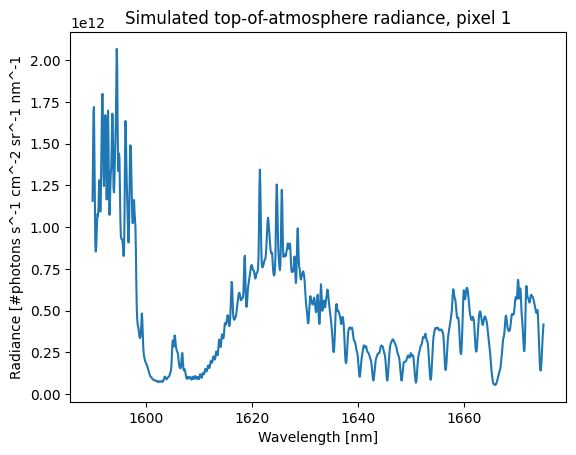

In [17]:
if show_spectrum:
    ini_basename = os.path.splitext(os.path.basename(ini_reduced))[0]
    if ini_basename.startswith('syn_'):
        ini_basename = ini_basename[4:]
    fwd_output = os.path.join(
        sgm2remotap_config['io_files']['dir_remotap_result'],
        f'syn_S7A_CO2_1B_RAD_____N_{ini_basename}.nc'
    )

    with h5netcdf.File(fwd_output) as nc:
        wl = nc['/data/band2/instrument_data/radiance_wavelength'][0,:]
        rad = nc['/data/band2/observation_data/radiance'][0,0,:]
        plt.plot(wl, rad)
        plt.xlabel('Wavelength [nm]')
        plt.ylabel('Radiance [#photons s^-1 cm^-2 sr^-1 nm^-1')
        plt.title('Simulated top-of-atmosphere radiance, pixel 1')
        plt.show()